In [154]:
# from google.colab import drive
# drive.mount('/content/drive')
# %cd drive/MyDrive/Academics/NLP/earnings-call-nlp

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
[Errno 2] No such file or directory: 'drive/MyDrive/Academics/NLP/earnings-call-nlp'
/content/drive/MyDrive/Academics/NLP/earnings-call-nlp


In [155]:
import os
import json
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt

In [156]:
files = ["data/FIQA_SA/task1_post_ABSA_train.json", "data/FIQA_SA/task1_headline_ABSA_train.json"]

In [157]:
data = pd.DataFrame(columns=["_id", "sentence", "aspect1", "aspect2", "sentiment_score"])
data_dict = {}
for _f in files:
    current_data = json.loads(open(_f, "r").read())
    data_dict.update(current_data)
for _id, item_dict in data_dict.items():
    sentence = item_dict["sentence"]
    aspects = item_dict["info"][0]["aspects"][2:-2]
    aspects_list = aspects.split('/')
    aspect1 = aspects_list[0]
    aspect2 = aspects_list[1] if(len(aspects_list)>1) else None
    sentiment_score = float(item_dict["info"][0]["sentiment_score"])
    data.loc[len(data)] = [_id, sentence, aspect1, aspect2, sentiment_score]

In [94]:
#plt.scatter(data._id, data.sentiment_score)

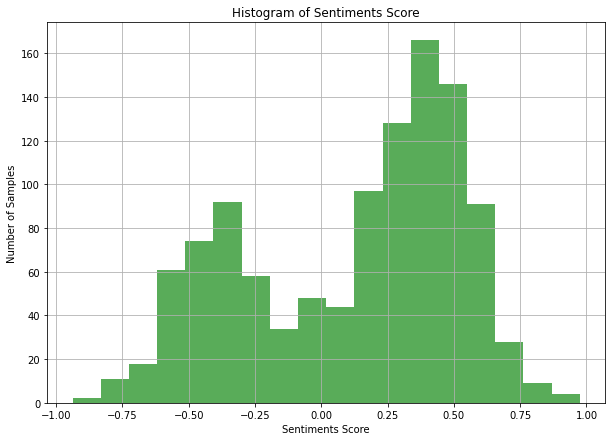

In [153]:
# the histogram of the data
n, bins, patches = plt.hist(data.sentiment_score, 18, density=False, facecolor='g', alpha=0.65)

plt.xlabel('Sentiments Score')
plt.ylabel('Number of Samples')
plt.title('Histogram of Sentiments Score')
plt.grid(True)
plt.show()

In [158]:
data.aspect1.unique()

array(['Stock', 'Market', 'Corporate', 'Economy'], dtype=object)

In [159]:
df_stock = data.loc[data.aspect1 == "Stock"]
df_stock_PriceAction = df_stock.loc[ df_stock.aspect2 == "Price Action"]
stock_PriceAction = df_stock_PriceAction.shape[0]

In [160]:
df_stock = data.loc[data.aspect1 == "Stock"]
df_stock_Others = df_stock.loc[ df_stock.aspect2 != "Price Action"]
stock_Others = df_stock_Others.shape[0]

df_corporate = data.loc[data.aspect1 == "Corporate"]
corporate = df_corporate.shape[0]

df_market = data.loc[data.aspect1 == "Market"]
market = df_market.shape[0]

df_economy = data.loc[data.aspect1 == "Economy"]
economy = df_economy.shape[0]

In [161]:
ls_count = [stock_PriceAction,stock_Others,corporate,market,economy]
ls_aspects = ['Stock/PriceAction','Stock/Others', 'Corporate', 'Market',  'Economy']

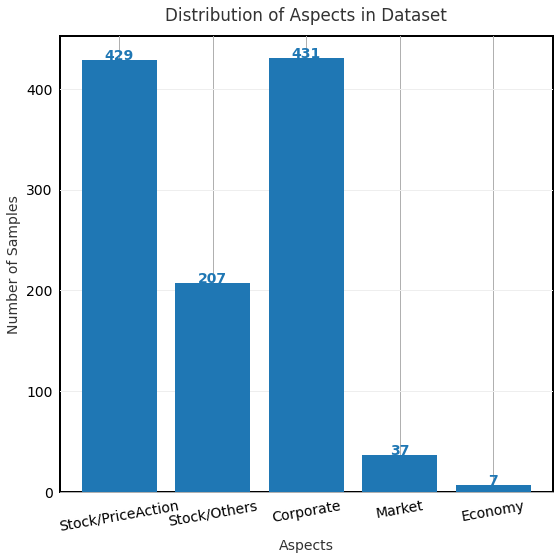

In [199]:
fig, ax = plt.subplots()
figsize=(800,100)
plt.rcParams['figure.figsize'] = [8, 8]
plt.rcParams.update({'font.size': 14})
# Save the chart so we can loop through the bars below.
bars = ax.bar(
    x=[0,1,2,3,4],
    height=ls_count,
    tick_label=ls_aspects
)

# Axis formatting.
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')
ax.tick_params(bottom=False, left=False)
ax.set_xticklabels(ls_aspects, rotation = 10)
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)

# Add text annotations to the top of the bars.
bar_color = bars[0].get_facecolor()
for bar in bars:
  ax.text(
      bar.get_x() + bar.get_width() / 2,
      bar.get_height() + 0.3,
      round(bar.get_height(), 1),
      horizontalalignment='center',
      color=bar_color,
      weight='bold'
  )
ax.grid(linestyle='-', linewidth=1)
# Add labels and a title. Note the use of `labelpad` and `pad` to add some
# extra space between the text and the tick labels.
#ax.xticks(rotation=45, ha="right")
ax.set_xlabel('Aspects', labelpad=5, color='#333333')
ax.set_ylabel('Number of Samples', labelpad=5, color='#333333')
ax.set_title('Distribution of Aspects in Dataset', pad=15, color='#333333')
ax.patch.set_edgecolor('black')  
ax.patch.set_linewidth('2')  
fig.tight_layout()